In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
v1_results = pd.read_csv("./v1_results.tsv", sep='\t')
v2_results = pd.read_csv("./v2_results.tsv", sep='\t')

In [3]:
df = pd.merge(v1_results, v2_results, on=["chr", "start", "stop"])

In [4]:
df.columns

Index(['chr', 'start', 'stop', 'type_v2_x', 'v1_MSE_0', 'v1_S_0', 'v1_MSE_1',
       'v1_S_1', 'v1_MSE_2', 'v1_S_2', 'v1_MSE_3', 'v1_S_3', 'v1_MSE_4',
       'v1_S_4', 'v1_MSE', 'v1_S', 'type_v2_y', 'model', 'v2_MSE_0', 'v2_S_0',
       'v2_MSE_1', 'v2_S_1', 'v2_MSE_2', 'v2_S_2', 'v2_MSE_3', 'v2_S_3',
       'v2_MSE_4', 'v2_S_4', 'v2_MSE', 'v2_S'],
      dtype='object')

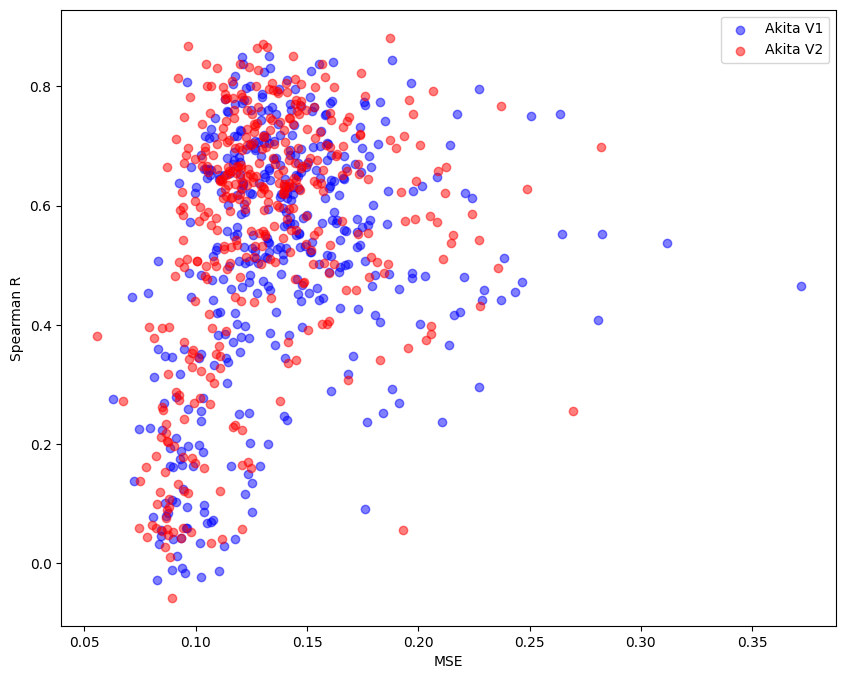

In [5]:
fig, ax = plt.subplots(figsize=(10, 8))

scatter = ax.scatter(df["v1_MSE"], df["v1_S"], alpha=0.5, c="blue", label="Akita V1")
scatter = ax.scatter(df["v2_MSE"], df["v2_S"], alpha=0.5, c="red", label="Akita V2")

ax.set_xlabel("MSE")
ax.set_ylabel("Spearman R")

ax.legend()

# ax.set_title(f"Correlation between boundary SCD and dot SCD; Pearson Correlation = {rounded_pearson_corr}")

# plt.savefig("./plots/boundarySCD_vs_dotSCD.png", bbox_inches="tight")

plt.show()

In [6]:
np.mean(df["v1_MSE"]), np.median(df["v1_MSE"])

(0.13908265785249999, 0.13280882500000002)

In [7]:
np.mean(df["v2_MSE"]), np.median(df["v2_MSE"])

(0.13087205595, 0.125250995)

In [8]:
np.mean(df["v1_S"]), np.median(df["v1_S"])

(0.5141589748736406, 0.5531928079364552)

In [9]:
np.mean(df["v2_S"]), np.median(df["v2_S"])

(0.5519038361105033, 0.6204250305601359)

In [16]:

# very close to diagonal -> chr1:73918464-74967040
# better performance -> chr9:132390912-133439488

highlight_point_1 = df[(df['chr'] == "chr1") & (df['start'] == 73918464) & (df['stop'] == 74967040)]
highlight_point_2 = df[(df['chr'] == "chr9") & (df['start'] == 132390912) & (df['stop'] == 133439488)]

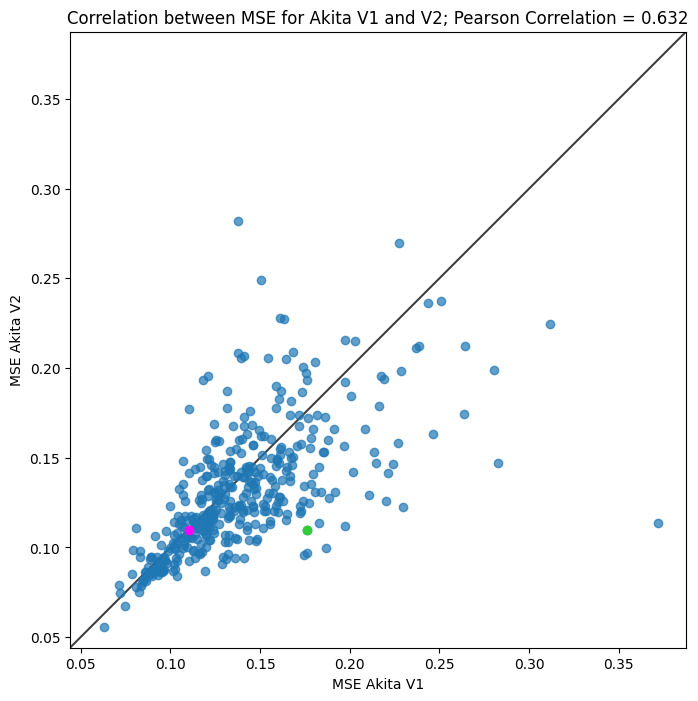

In [17]:
fig, ax = plt.subplots(figsize=(10, 8))

scatter = ax.scatter(df["v1_MSE"], df["v2_MSE"], alpha=0.7)

ax.scatter(highlight_point_1["v1_MSE"], highlight_point_1["v2_MSE"], color="magenta")

ax.scatter(highlight_point_2["v1_MSE"], highlight_point_2["v2_MSE"], color="limegreen")

pearson_corr = stats.pearsonr(df["v1_MSE"], df["v2_MSE"]).statistic
rounded_pearson_corr = round(pearson_corr, 3)

lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
]

# # now plot both limits against eachother
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
ax.set_aspect('equal')
ax.set_xlim(lims)
ax.set_ylim(lims)

ax.set_xlabel("MSE Akita V1")
ax.set_ylabel("MSE Akita V2")

ax.set_title(f"Correlation between MSE for Akita V1 and V2; Pearson Correlation = {rounded_pearson_corr}")

# plt.savefig("./plots/boundarySCD_vs_dotSCD.png", bbox_inches="tight")

plt.show()


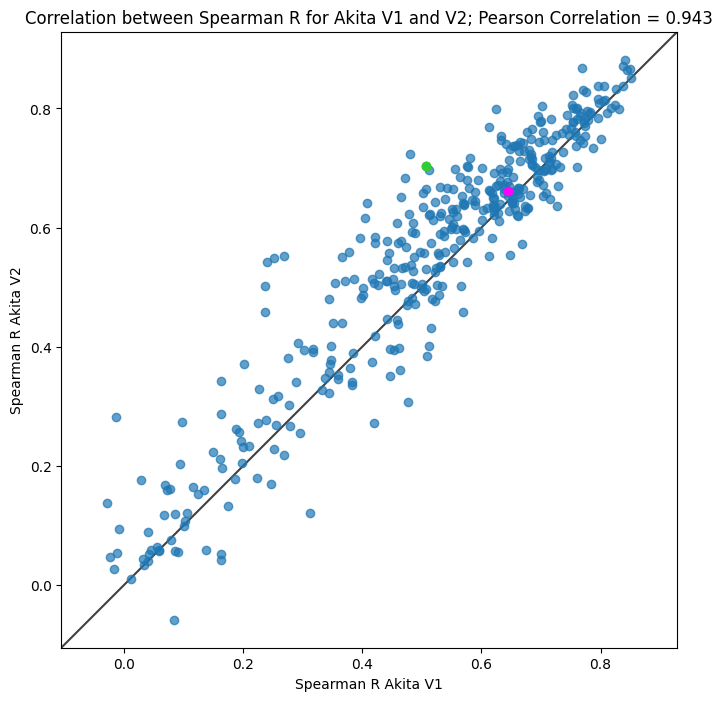

In [18]:
fig, ax = plt.subplots(figsize=(10, 8))

scatter = ax.scatter(df["v1_S"], df["v2_S"], alpha=0.7)

ax.scatter(highlight_point_1["v1_S"], highlight_point_1["v2_S"], color="magenta")

ax.scatter(highlight_point_2["v1_S"], highlight_point_2["v2_S"], color="limegreen")


pearson_corr = stats.pearsonr(df["v1_S"], df["v2_S"]).statistic
rounded_pearson_corr = round(pearson_corr, 3)

lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
]

# # now plot both limits against eachother
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
ax.set_aspect('equal')
ax.set_xlim(lims)
ax.set_ylim(lims)


ax.set_xlabel("Spearman R Akita V1")
ax.set_ylabel("Spearman R Akita V2")

ax.set_title(f"Correlation between Spearman R for Akita V1 and V2; Pearson Correlation = {rounded_pearson_corr}")

# plt.savefig("./plots/boundarySCD_vs_dotSCD.png", bbox_inches="tight")

plt.show()